# Code for analyzing statistical features of several precipitation stations


### You have to use csv file to import data to python. You can see following picture how to go in to your data. -5 was  used to identify nan or empty variables.
###  1) Python dictonary was used for storing data. Keys = stations and values = numpy.array

###  2) Stationarity test can perfom for all stations.

###  3) 5 Homogeneity test would be used to examine homogeneity of datas.

###  4) There are all a lot of methods in the DataProcessing class and I used them step by step in next sections.


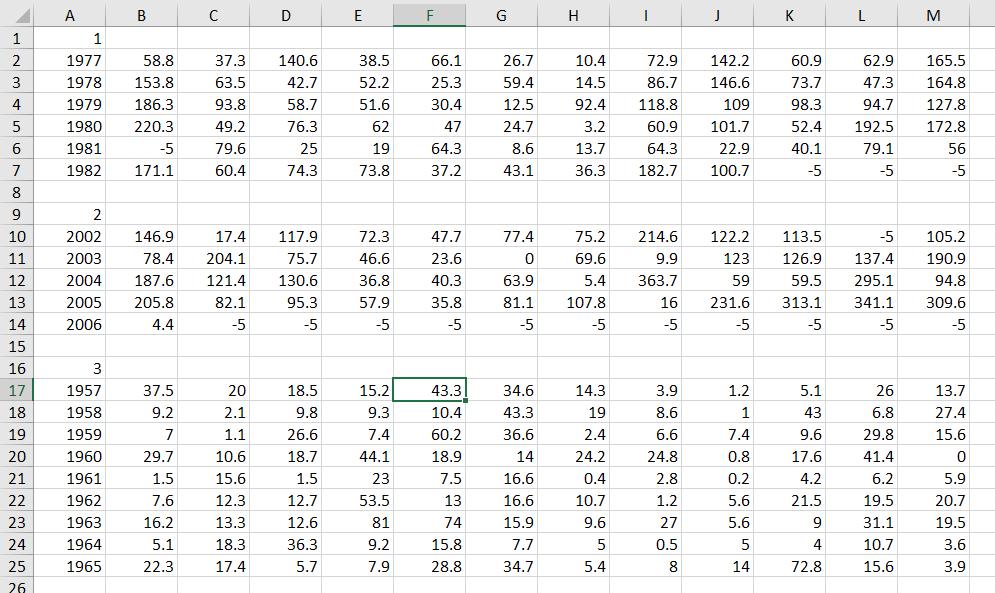

In [1]:
from IPython import display 
display.Image("data_handling.png")

In [2]:
# Importing class from data_proccessing.py file.
from data_processing import DataProcessing as dt

In [3]:
# Creating instance of given data sets.
f1 = dt("prec_data.csv")
print(f1)

In [4]:
# You can see the all information about stations by using general_info function.
print(f1.general_info())

General information about the given station !
Monthly flow or precipitation of given data set 
--------------------
Data set have 404 stations and 10 of them are [1, 22, 475, 560, 626, 630, 643, 660, 686, 696, 697]
Maximum time  is 92 year and minimum is 14
--------------------


In [5]:
# You can see the all stations. I just show first 10 stations.
stations = f1.stations[0:11]
print(stations)

[1, 22, 475, 560, 626, 630, 643, 660, 686, 696, 697]


In [6]:
# Precipitation data for station 1. Data storing in the dictonary. Keys = stations and values = numpy.array
f1.datas[1]

array([[  nan,  69.4, 112.9,  53.4,  22.1,  67.8,  74.7,   0.6, 210.8,
        149.2,  61.1, 179.1],
       [ 63.5, 128.7,  75.3,  69.2,  20.4,  17.5,  24.4,  16.1,  13.7,
        204. , 169.4, 124. ],
       [ 81.5,  35.5, 102.9,  57. ,  41.1,  26.3,  39.4,  54.8,  46.2,
         18.7,  57.3, 104.9],
       [ 91.6,  96.4, 109.6,  43.7,  27.8, 146.5,  25.9,  34.3,  66.2,
         61.4, 192.5, 123.2],
       [130.1, 104.7,  89.9,  20.3,   6.7,  21.9,  22.9, 158.6, 168.1,
        126.3, 106.2, 128.9],
       [125.2,  47.7,  43.9,  99.2,  48.8,  71.7,   2.3,   0.9,  58.4,
         66.6,  95.2,  99.9],
       [ 96.5,  45.6,  60.6,  21.4,  80. ,  55.9,  25. ,  38. , 115.2,
        111.6,  50.9, 173.5],
       [  8.8,  70.8,  90.2,  48.4,  81.6,   9.8,   0.6, 110.6,  41.4,
        236.8, 121.2, 206.3],
       [ 81.4,  28. ,  31.6,  59.9,  19.9,  71.7,  42. ,  35.5,  85.3,
        189.7, 146. ,  64.8],
       [ 52.4,  45.9,  44.2,  44.6,  13.6,  66.8,   3.9,  76.8,  11.9,
         90.2, 238.5

In [7]:
# You can see the statistics for spesific station.
f1.show_statistics(station=1)

,1963.0,1965.0,1966.0,1967.0,1968.0,1969.0,1970.0,1971.0,1972.0,1973.0,1974.0,1975.0,1976.0,1977.0,1978.0,1979.0,1980.0,1981.0,1982.0
Max,210.800000,204.000000,104.900000,192.500000,168.100000,125.200000,173.500000,236.800000,189.700000,238.500000,138.400000,160.800000,145.000000,165.500000,164.800000,186.300000,220.300000,79.600000,182.700000
Min,0.600000,13.700000,18.700000,25.900000,6.700000,0.900000,21.400000,0.600000,19.900000,3.900000,13.600000,1.200000,8.400000,10.400000,14.500000,12.500000,3.200000,8.600000,36.300000
average,91.009091,77.183333,55.466667,84.925000,90.383333,63.316667,72.850000,85.541667,71.316667,68.716667,56.400000,83.358333,71.950000,73.566667,77.541667,89.525000,88.583333,42.963636,86.622222
std_deviation,62.142160,62.596923,26.659937,49.604757,55.270740,36.546519,42.670179,71.754680,48.564473,62.111323,38.607793,54.375047,44.550374,47.377620,48.560503,44.734497,66.456262,25.358171,52.109431


In [8]:
# The missing values for the spesific station can be seen as 
f1.missing_values_percentage(station=1)[1]  

'Station = 1, 5 data is missing, % 2.1929824561403506 all of datas!'

In [9]:
 # Also we can choose stations which minimum required year or missing_value percentage.
f1.choose_stations(min_year=50,min_mis_val_per=5) # 50 is minimum year requirements and 5 is the missing value percentage

(3, [17096, 17244, 17619])

In [10]:
# The Kolmogrov- Smirnov test can be used to determine most suitable distributions. Details are given Scipy.stats
f1.distribution_test(station=1)

('The most fitting distrubiton is gamma',
 [('gamma', 0.03576006280072619, 0.922321928824533),
  ('norm', 0.09954273677420405, 0.020295521147296033),
  ('loggamma', 0.10026605295027285, 0.018987494464329298),
  ('lognorm', 0.5926670791551485, 6.8198610617398835e-77)])

In [11]:
# Ww can replace the nan values with median of month column. replace_missing_median(station) function eleminates and changes self.data variable.
f1.replace_missing_median(station=1)

array([[ 96.5 ,  69.4 , 112.9 ,  53.4 ,  22.1 ,  67.8 ,  74.7 ,   0.6 ,
        210.8 , 149.2 ,  61.1 , 179.1 ],
       [ 63.5 , 128.7 ,  75.3 ,  69.2 ,  20.4 ,  17.5 ,  24.4 ,  16.1 ,
         13.7 , 204.  , 169.4 , 124.  ],
       [ 81.5 ,  35.5 , 102.9 ,  57.  ,  41.1 ,  26.3 ,  39.4 ,  54.8 ,
         46.2 ,  18.7 ,  57.3 , 104.9 ],
       [ 91.6 ,  96.4 , 109.6 ,  43.7 ,  27.8 , 146.5 ,  25.9 ,  34.3 ,
         66.2 ,  61.4 , 192.5 , 123.2 ],
       [130.1 , 104.7 ,  89.9 ,  20.3 ,   6.7 ,  21.9 ,  22.9 , 158.6 ,
        168.1 , 126.3 , 106.2 , 128.9 ],
       [125.2 ,  47.7 ,  43.9 ,  99.2 ,  48.8 ,  71.7 ,   2.3 ,   0.9 ,
         58.4 ,  66.6 ,  95.2 ,  99.9 ],
       [ 96.5 ,  45.6 ,  60.6 ,  21.4 ,  80.  ,  55.9 ,  25.  ,  38.  ,
        115.2 , 111.6 ,  50.9 , 173.5 ],
       [  8.8 ,  70.8 ,  90.2 ,  48.4 ,  81.6 ,   9.8 ,   0.6 , 110.6 ,
         41.4 , 236.8 , 121.2 , 206.3 ],
       [ 81.4 ,  28.  ,  31.6 ,  59.9 ,  19.9 ,  71.7 ,  42.  ,  35.5 ,
         85.3 , 189.7 , 

In [12]:
# stationarity test divides data into two group and testing for %5 significance level
f1.stationarity_test(1)

"The values [ 0.25194144 -0.23901264] inside of boundaries [1.96, -1.96] that's why given data set stationary for the %5 level significance level."

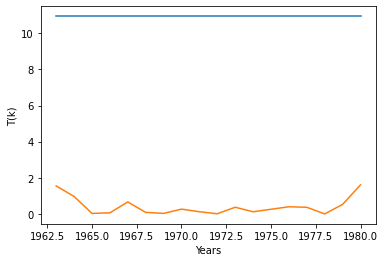

'Homogeneous'

In [13]:
# Standart Normal Homogeneity or Ratio test.
f1.ratio_test(1,plotting = True)
# Critical value (blue line) for %1 Signifiance level has to be greater than the T(k) values.

In [14]:
# Von - Neumann ratio test 
f1.von_neumann_ratio(station=1)

'Not Homogeneous'

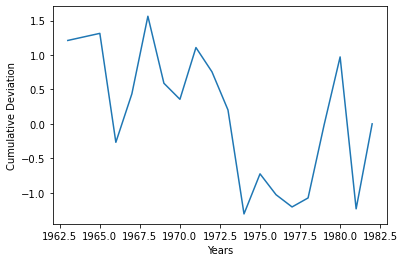

'Homogeneous'

In [15]:
#Cumulative_deviation test.
f1.cumulative_deviation(station=1,plotting=True)

In [19]:
# Bayesian_statistic test for homogeneity.
f1.bayesian_statistic(station =1)

'Homogeneous'

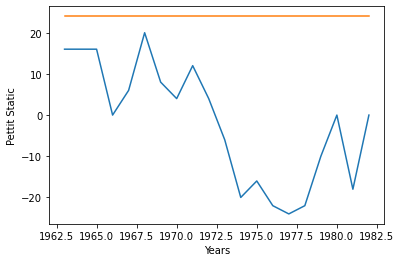

'Homogeneous'

In [20]:
# Pettit's test 
f1.pettit_test(station=1, plotting = True)